In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
import sklearn.linear_model as linr
import sklearn.model_selection as model_selection
import numpy as np

%matplotlib inline 

In [2]:
target_dir=pathlib.Path("/media/mjsobrep/43CDA61E672B9161/pose/")
results=pd.read_csv(target_dir/"ss_ch.csv")

In [3]:
results

,Unnamed: 0,subject,side,bbt,age,convex_hull,arm_length,norm_convex_hull
0,0,23,R,-2.561644,4,3.107215e+07,276.305789,0.351652
1,1,23,L,-2.561644,4,2.721437e+07,273.391793,0.317946
2,2,23,R,-2.561644,4,3.619169e+08,1400.678772,0.031442
3,3,23,L,-2.561644,4,3.569951e+08,940.832840,0.102338
4,4,44,R,-10.169811,7,1.366290e+07,433.546605,0.040026
...,...,...,...,...,...,...,...,...
83,83,20,L,-1.408451,81,6.160530e+08,785.249072,0.303744
84,84,25,R,-0.704225,76,1.530936e+08,463.183695,0.367797
85,85,25,L,-0.704225,76,1.181609e+08,472.666067,0.267130
86,86,25,R,-0.704225,76,1.340427e+08,473.042567,0.302311


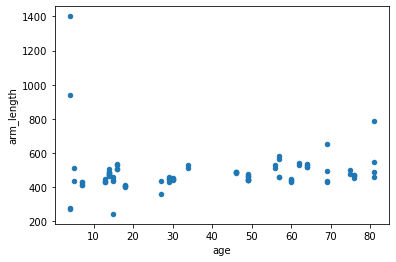

In [4]:
results.plot("age", "arm_length", "scatter")

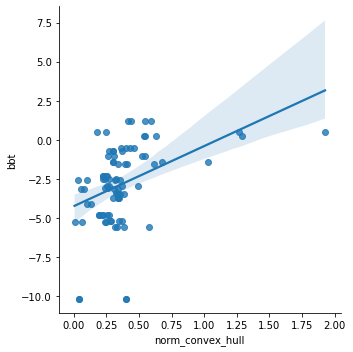

In [5]:
sns.lmplot(x='norm_convex_hull',y='bbt',data=results,fit_reg=True) 

In [6]:
bbt_vals=results['bbt'].values.reshape(-1,1)
ch_vals=results['norm_convex_hull'].values.reshape(-1,1)

In [7]:
reg=linr.LinearRegression().fit(ch_vals,bbt_vals)
print(f'bbt z-score={reg.coef_}*norm_convex_hull + {reg.intercept_} || R^2={reg.score(ch_vals,bbt_vals)}')

bbt z-score=[[3.8452337]]*norm_convex_hull + [-4.24350839] || R^2=0.17658726205851527


In [8]:
lm = linr.LinearRegression()
cv = model_selection.LeaveOneOut().split(results) # leave one out doesn't work for linear regression with r^2
scores = model_selection.cross_val_score(lm,  ch_vals,bbt_vals, scoring='neg_mean_absolute_error', cv=cv)
print(f'MAE: {np.mean(np.absolute(scores))}')

MAE: 1.7288276058952519


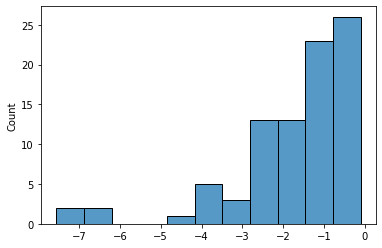

In [9]:
sns.histplot(scores)

Pretty bad performance. Outliers aren't helping. Let's try RANSAC

In [10]:
lm = linr.RANSACRegressor()
cv = model_selection.LeaveOneOut().split(results) # leave one out doesn't work for linear regression with r^2
scores = model_selection.cross_val_score(lm,  ch_vals,bbt_vals, scoring='neg_mean_absolute_error', cv=cv)
print(f'MAE: {np.mean(np.absolute(scores))}')

MAE: 2.0670517689381724


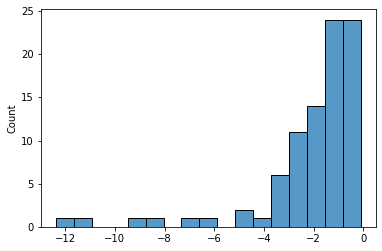

In [11]:
sns.histplot(scores)

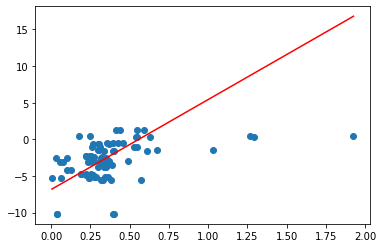

In [12]:
plt.scatter(ch_vals, bbt_vals)
lm.fit(ch_vals, bbt_vals)
xaxis = np.array([ch_vals.min(), ch_vals.max()])
yaxis = lm.predict(xaxis.reshape((len(xaxis), 1)))
plt.plot(xaxis,yaxis,'r')

MAE is worse with RANSAC, but the fit is obviously better. MAE might not be the best measure...